### Kaggle 竞赛 | 泰坦尼克灾难中的机器学习

>泰坦尼克号的沉没是历史上最臭名昭著的沉船事件之一。1912年4月15日，泰坦尼克号首航时撞上冰山沉没，2224名乘客和船员中1502人遇难。这一耸人听闻的悲剧震惊了国际社会，并导致了更好的船舶安全法规。

>这次海难造成这么多人死亡的原因之一是没有足够的救生艇来容纳乘客和船员。虽然在沉船中幸存有一些运气因素，但一些群体，如妇女、儿童和上层社会，比其他群体更有可能幸存。

>在这个比赛中，我们要求你完成对什么样的人可能存活下来的分析。我们特别要求你们运用机器学习的工具来预测哪些乘客在这场悲剧中幸存下来。

>这场Kaggle入门比赛为那些在数据科学和机器学习方面没有太多经验的人提供了一个理想的起点。”

### 这个Notebook的目标:
展示一个简单的示例，使用完整的PyData实用程序对Python中的泰坦尼克号灾难进行分析。这是针对那些希望进入该领域或已经进入该领域并希望看到用Python完成的分析示例的人。

#### 这个Notebook将站是一个基础的例子，它包括：
#### 数据处理
*   通过Pandas导入数据
*   清洗数据
*   使用Matplotlib通过可视化的方式探索数据

#### 数据分析
*    监督机器学习技术:
    +   逻辑回归模型 
    +   绘图结果
    +   Support Vector Machine (SVM) using 3 kernels
    +   基础随机森林
    +   绘图结果

#### 分析的评估验证
*   k折叠交叉验证，以评估局部结果
*   将IPython笔记本的结果输出到Kaggle



#### Required Libraries:
* [NumPy](http://www.numpy.org/)
* [IPython](http://ipython.org/)
* [Pandas](http://pandas.pydata.org/)
* [SciKit-Learn](http://scikit-learn.org/stable/)
* [SciPy](http://www.scipy.org/)
* [StatsModels](http://statsmodels.sourceforge.net/)
* [Patsy](http://patsy.readthedocs.org/en/latest/)
* [Matplotlib](http://matplotlib.org/)

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline
#plt.rcParams['font.sans-serif']=['Microsoft YaHei'] #显示中文标签
#plt.rcParams['axes.unicode_minus']=False   #这两行需要手动设置
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.nonparametric.kde import KDEUnivariate
from statsmodels.nonparametric import smoothers_lowess
from pandas import Series, DataFrame
from patsy import dmatrices
from sklearn import datasets, svm
from KaggleAux import predict as ka # see github.com/agconti/kaggleaux for more details

### 数据处理
#### 让我们使用pandas读取数据:

In [39]:
df = pd.read_csv("data/train.csv") 

展示我们数据的全貌: 

In [40]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### 让我们看下:

以上是包含在`Pandas``DataFrame`中的我们的数据摘要。可以把“DataFrame”看作是Excel表格中Python的工作流的超级版本。正如您所看到的，摘要包含了相当多的信息。首先，它让我们知道我们有891个观察结果，或乘客，可以在这里进行分析:

接下来，它显示了`DataFrame`中的所有列。每一列都告诉我们观察结果的一些信息，比如他们的`名字`、`性别`或`年龄`。这些列被称为数据集的特性。

在每个特性之后，它让我们知道它包含了多少个值。虽然我们的大多数功能在每次观察中都有完整的数据，就像这里的`survived`特征:

    survived    891  non-null values 

有些缺失了信息，比如 `age` 特征: 

    age         714  non-null values 

这些缺失信息用`NaN`表现。

### 小心缺失值:
`ticket`和`cabin`的特征有许多缺失的值，因此不能为我们的分析增加很多价值。为了处理这个问题，我们将把它们从数据帧中删除，以保持数据集的完整性。

为此，我们将使用这行代码完全删除这些特性:

    df = df.drop(['ticket','cabin'], axis=1) 


同时，这行代码从每个剩余的列/特性中删除包含`NaN `的值:
   
    df = df.dropna()
     
现在我们有了一个干净整洁的数据集，可以进行分析了。因为`.dropna() `会从我们的数据中删除即使其中一个特性中只有1个`NaN`，所以如果我们没有首先删除` ticket `和` cabin `特性，它就会删除我们的大部分数据集。

In [41]:
df = df.drop(['Ticket','Cabin'], axis=1)
# Remove NaN values
df = df.dropna() 

### 让我们以图表的形式看看我们的数据:

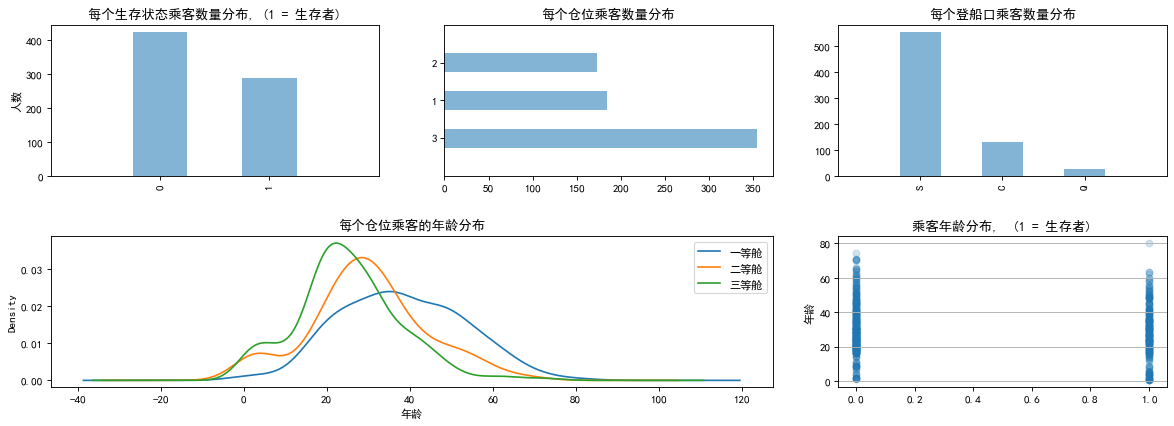

In [96]:
# 原理：利用plt.subplot2grid初始化多块画布，每次取其中一块来画，画完取另一块，最后统一显示。
# 初始化一块画，并指定大小（宽，高）及dpi（分辨率）
fig = plt.figure(figsize=(18,6),dpi=80) 
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# 一起绘制许多不同形状的图形，第一对参数是画布的行列个数，第二对参数是定义返回位于哪个坐标点的画布
ax1 = plt.subplot2grid((2,3),(0,0))
# 用条形图表示那些存活下来的人和那些没有存活下来的人，alpha为颜色饱和度。该图像将被画在ax2画布上，因为如果画图时不指定画布，那么将默认画在最近被初始化出来的画布上
df.Survived.value_counts().plot(kind='bar', alpha=0.55)
#-ax1.bar(df.Survived.value_counts().index,df.Survived.value_counts().values,alpha=0.5)
# 设置x轴的范围
ax1.set_xlim(-1, 2)
plt.ylabel("人数")
# 为我们的图形设置一个标题
plt.title('每个生存状态乘客数量分布, (1 = 生存者)')
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
ax2 = plt.subplot2grid((2,3),(1,2))
plt.scatter(df.Survived, df.Age, alpha=0.2)
#-ax2.scatter(df.Survived, df.Age, alpha=0.2)
plt.ylabel("年龄")
# 设置网格样式                          
plt.grid(b=True, which='major', axis='y') 
#-ax2.grid(color='g', linestyle='--', linewidth=0.1,alpha=0.3)
plt.title("乘客年龄分布,  (1 = 生存者)")
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
ax3 = plt.subplot2grid((2,3),(0,1))
# barh为横向条形图
df.Pclass.value_counts().plot(kind="barh", alpha=0.55)
# 设置横向条形图的y轴，即仓位范围
ax3.set_ylim(-1, len(df.Pclass.value_counts()))
plt.title("每个仓位乘客数量分布")
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
ax4 = plt.subplot2grid((2,3),(1,0), colspan=2)
# 绘制不同仓位的年龄核密度曲线
df.Age[df.Pclass == 1].plot(kind='kde')
df.Age[df.Pclass == 2].plot(kind='kde')
df.Age[df.Pclass == 3].plot(kind='kde')
# 两种方法设置坐标轴名
plt.xlabel('年龄')
#-ax4.set_xlabel("年龄")
# 两种防范设置画布标题
plt.title("每个仓位乘客的年龄分布")
#-ax4.set_title("不同仓位的年龄分布")
# sets our legend for our graph.
plt.legend(('一等舱', '二等舱','三等舱'),loc='best') 
#-ax4.legend(('一等舱', '二等舱','三等舱'),loc='best') 
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
ax5 = plt.subplot2grid((2,3),(0,2))
df.Embarked.value_counts().plot(kind='bar', alpha=0.55)
ax5.set_xlim(-1, len(df.Embarked.value_counts()))
# specifies the parameters of our graphs
plt.title("每个登船口乘客数量分布")
# 设置子画布之间的间距
plt.subplots_adjust(hspace=0.4, wspace=0.2)

### 可视化探索:

这场比赛的目的是根据数据中的特征预测一个人是否能够生存，比如:
 
 * 仓位(pclass in the dat)
 * 性别 
 * 年龄
 * 船票价格

让我们看看是否能更好地了解谁活了下来，谁死了。


首先，让我们绘制一张幸存者与未幸存者的条形图。

Text(0.5, 1.0, '每个生存状态乘客数量分布, (1 = 生存者)')

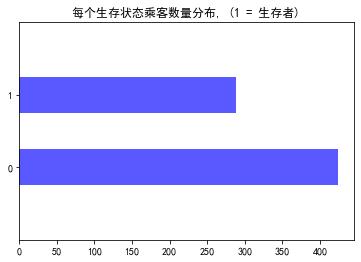

In [45]:
# 简洁初始化一个fig对象和ax对象
fig, ax = plt.subplots()
df.Survived.value_counts().plot(kind='barh', color="blue", alpha=.65)
ax.set_ylim(-1, len(df.Survived.value_counts())) 
plt.title("每个生存状态乘客数量分布, (1 = 生存者)")

### 现在让我们从数据中找出更多的结构,
### 让我们按性别将前面的图表分解

(-1, 2)

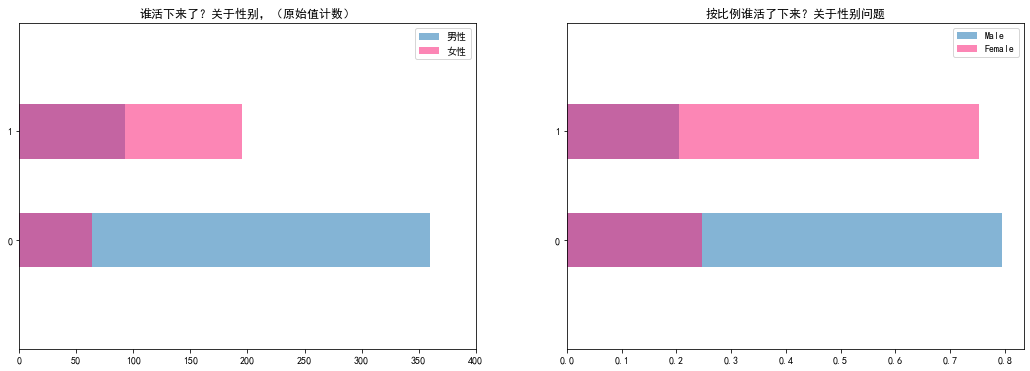

In [91]:
#这个分析有问题，颜色出了问题，按说一个图标只有两种颜色，这里出现了三种，而且还不对。
fig = plt.figure(figsize=(18,6))
#create a plot of two subsets, male and female, of the survived variable.
#After we do that we call value_counts() so it can be easily plotted as a bar graph. 
#'barh' is just a horizontal bar graph
df_male = df.Survived[df.Sex == 'male'].value_counts().sort_index()
df_female = df.Survived[df.Sex == 'female'].value_counts().sort_index()

ax1 = fig.add_subplot(121)
df_male.plot(kind='barh',label='男性', alpha=0.55)
df_female.plot(kind='barh', color='#FA2379',label='女性', alpha=0.55)
plt.title("谁活下来了？关于性别，（原始值计数）"); plt.legend(loc='best')
ax1.set_ylim(-1, 2) 
ax1.set_xlim(0, 400) 

#adjust graph to display the proportions of survival by gender
ax2 = fig.add_subplot(122)
(df_male/float(df_male.sum())).plot(kind='barh',label='Male', alpha=0.55)  
(df_female/float(df_female.sum())).plot(kind='barh', color='#FA2379',label='Female', alpha=0.55)
plt.title("按比例谁活了下来？关于性别问题"); plt.legend(loc='best')

ax2.set_ylim(-1, 2)

很明显，尽管在原始价值计算中死亡和存活的男性更多，但女性的存活率比例（25%）高于男性（20%）

#### 非常好！但让我们更进一步：

我们可以使用Pclass找出更多的结构吗？让我们按性别和他们乘坐的舱位来细分。

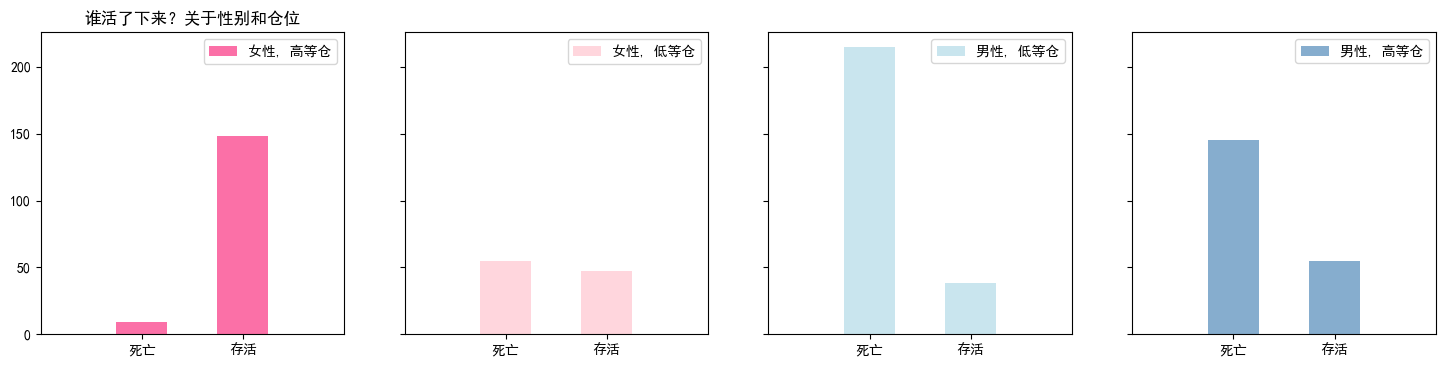

In [77]:
fig = plt.figure(figsize=(18,4), dpi=100)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# 这里我们在性别子集中创造出来了额外的子集 
ax1=fig.add_subplot(141)
female_highclass = df.Survived[df.Sex == 'female'][df.Pclass != 3].value_counts()
female_highclass.sort_index(ascending=True).plot(kind='bar', label='女性, 高等仓', color='#FA2479', alpha=0.65)
# 设置x轴刻度标签
ax1.set_xticklabels(["死亡", "存活"], rotation=0)
ax1.set_xlim(-1, len(female_highclass))
plt.title("谁活了下来？关于性别和仓位"); plt.legend(loc='best')
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# 两个属于同一父画布的子画布之间，可以设置共享y轴
ax2=fig.add_subplot(142, sharey=ax1)
female_lowclass = df.Survived[df.Sex == 'female'][df.Pclass == 3].value_counts()
female_lowclass.plot(kind='bar', label='女性, 低等仓', color='pink', alpha=alpha_level)
ax2.set_xticklabels(["死亡","存活"], rotation=0)
ax2.set_xlim(-1, len(female_lowclass))
plt.legend(loc='best')
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
ax3=fig.add_subplot(143, sharey=ax1)
male_lowclass = df.Survived[df.Sex == 'male'][df.Pclass == 3].value_counts()
male_lowclass.plot(kind='bar', label='男性, 低等仓',color='lightblue', alpha=alpha_level)
ax3.set_xticklabels(["死亡","存活"], rotation=0)
ax3.set_xlim(-1, len(male_lowclass))
plt.legend(loc='best')
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
ax4=fig.add_subplot(144, sharey=ax1)
male_highclass = df.Survived[df.Sex == 'male'][df.Pclass != 3].value_counts()
male_highclass.plot(kind='bar', label='男性, 高等仓', alpha=alpha_level, color='steelblue')
ax4.set_xticklabels(["死亡","存活"], rotation=0)
ax4.set_xlim(-1, len(male_highclass))
plt.legend(loc='best')

令人惊叹！现在我们有了更多关于谁在悲剧中幸存和死亡的信息。有了更深入的理解，我们就能更好地创建更具洞察力的模型。这是交互式数据分析中的典型过程。首先，您从小事做起，了解最基本的关系，随着您对正在处理的数据的了解越来越多，您的分析的复杂性逐渐增加。以下是流程的进展情况：

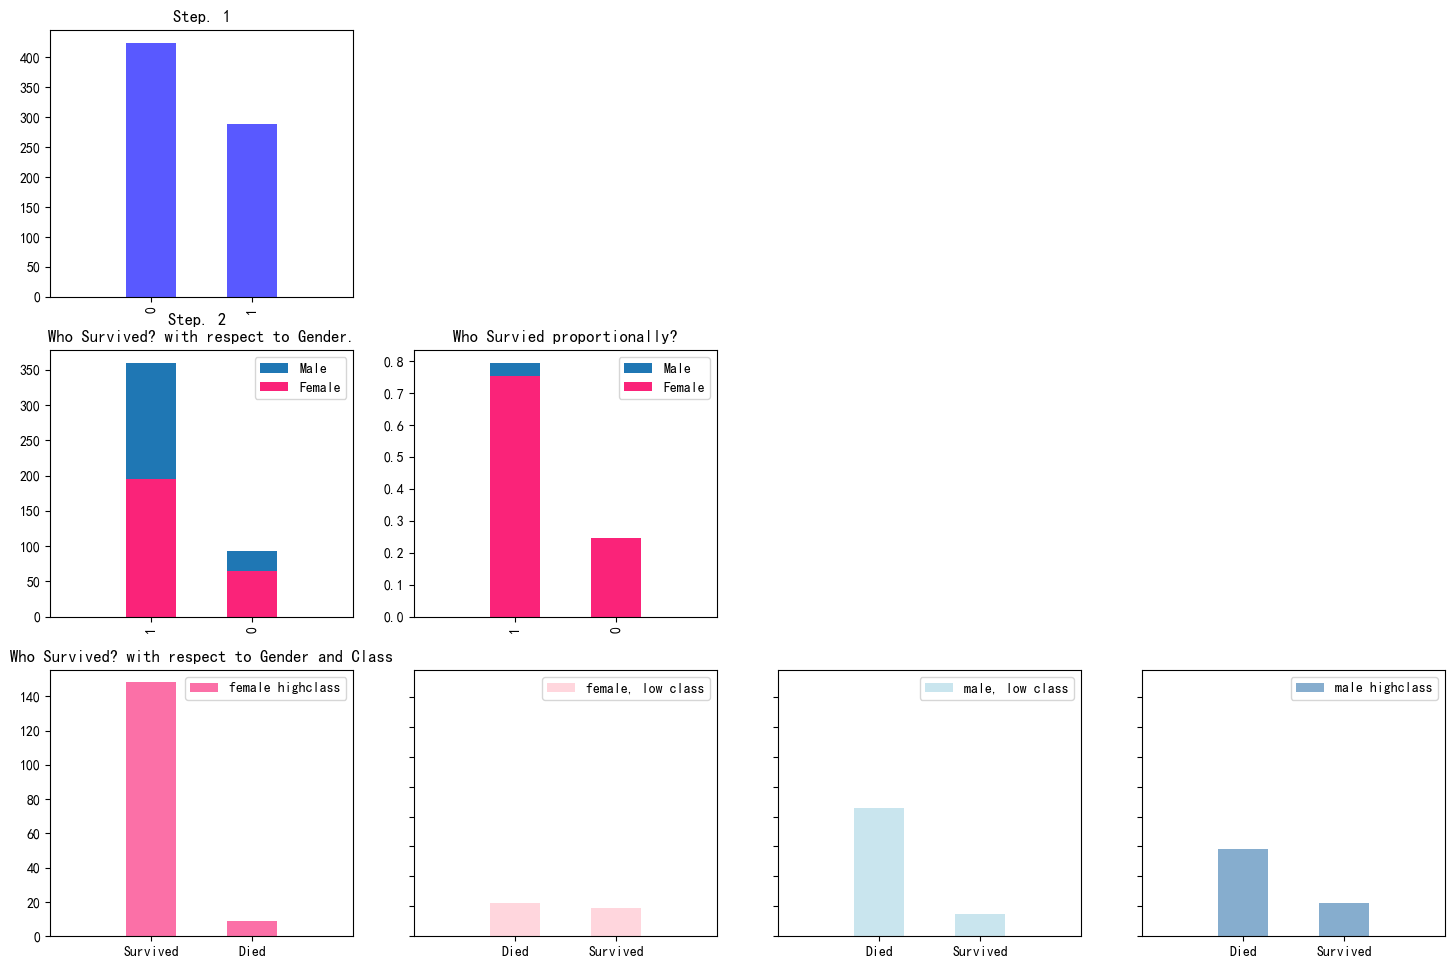

In [84]:
fig = plt.figure(figsize=(18,12), dpi=100)
a = 0.65
# Step 1
ax1 = fig.add_subplot(341)
df.Survived.value_counts().plot(kind='bar', color="blue", alpha=a)
ax1.set_xlim(-1, len(df.Survived.value_counts()))
plt.title("Step. 1")

# Step 2
ax2 = fig.add_subplot(345)
df.Survived[df.Sex == 'male'].value_counts().plot(kind='bar',label='Male')
df.Survived[df.Sex == 'female'].value_counts().plot(kind='bar', color='#FA2379',label='Female')
ax2.set_xlim(-1, 2)
plt.title("Step. 2 \nWho Survived? with respect to Gender."); plt.legend(loc='best')

ax3 = fig.add_subplot(346)
(df.Survived[df.Sex == 'male'].value_counts()/float(df.Sex[df.Sex == 'male'].size)).plot(kind='bar',label='Male')
(df.Survived[df.Sex == 'female'].value_counts()/float(df.Sex[df.Sex == 'female'].size)).plot(kind='bar', color='#FA2379',label='Female')
ax3.set_xlim(-1,2)
plt.title("Who Survied proportionally?"); plt.legend(loc='best')

# Step 3
ax4 = fig.add_subplot(349)
female_highclass = df.Survived[df.Sex == 'female'][df.Pclass != 3].value_counts()
female_highclass.plot(kind='bar', label='female highclass', color='#FA2479', alpha=a)
ax4.set_xticklabels(["Survived", "Died"], rotation=0)
ax4.set_xlim(-1, len(female_highclass))
plt.title("Who Survived? with respect to Gender and Class"); plt.legend(loc='best')

ax5 = fig.add_subplot(3,4,10, sharey=ax1)
female_lowclass = df.Survived[df.Sex == 'female'][df.Pclass == 3].value_counts()
female_lowclass.plot(kind='bar', label='female, low class', color='pink', alpha=a)
ax5.set_xticklabels(["Died","Survived"], rotation=0)
ax5.set_xlim(-1, len(female_lowclass))
plt.legend(loc='best')

ax6 = fig.add_subplot(3,4,11, sharey=ax1)
male_lowclass = df.Survived[df.Sex == 'male'][df.Pclass == 3].value_counts()
male_lowclass.plot(kind='bar', label='male, low class',color='lightblue', alpha=a)
ax6.set_xticklabels(["Died","Survived"], rotation=0)
ax6.set_xlim(-1, len(male_lowclass))
plt.legend(loc='best')

ax7 = fig.add_subplot(3,4,12, sharey=ax1)
male_highclass = df.Survived[df.Sex == 'male'][df.Pclass != 3].value_counts()
male_highclass.plot(kind='bar', label='male highclass', alpha=a, color='steelblue')
ax7.set_xticklabels(["Died","Survived"], rotation=0)
ax7.set_xlim(-1, len(male_highclass))
plt.legend(loc='best')

我已经尽了最大努力使绘图代码可读性和直观性，但是如果您想了解如何在matplotlib中开始绘图的更详细信息，请自行搜索教程。